# 응용통계학 (12주차) 5월 19일
> GLM, 일반화선형모형 2번째

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics, GLM, 일반화 선형 모형]

In [4]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=6,repr.plot.res=300)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)

# 일반화선형모형 : Generalized linear model II

이전 절에서는 binary response에 대해서 다루었다. binomial response 또한 비슷한 방식으로 다루어질 수 있다.

$Y_i$가 이항분포로써 $B(m_i,p_i), i=1,2,…,n$과 같이 분포한다고 가정하고 $q$개의 설명변수가 있다고 가정하자.

binary와 마찬가지로 다음과 같이 모형화 한다.

$$η_i=g(p_i)=β_0+β_1x_{i1}+⋯+β_qx_{qi}$$

> `Challenger` data : 1986년에 발사직후 폭발한 우주왕복선 챌린저호는 엔진상의 부품 중 O-ring에 문제가 있었던 것으로 밝혀졌다. 23회의 이번 mission에서 관측된 데이터가 기록되었다. 왕복선 내에는 총 6개의 O-ring 부품이 있으며 온도에 따라서 부품이상작동 확률이 변하는 것으로 알려져 있다. 발사 당시 온도는 31F로 기룩되었다.

$\chi_i \sim B(6,p_i), i=1,2,3$
- 6개 관측
- p는 정상작동확률

In [5]:
library(faraway)

In [6]:
data(orings, package="faraway")
t(orings)

,1,2,3,4,5,6,7,8,9,10,⋯,14,15,16,17,18,19,20,21,22,23
temp,53,57,58,63,66,67,67,67,68,69,⋯,70,72,73,75,75,76,76,78,79,81
damage,5,1,1,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0


- 이상작동한 것이면 1씩 증가

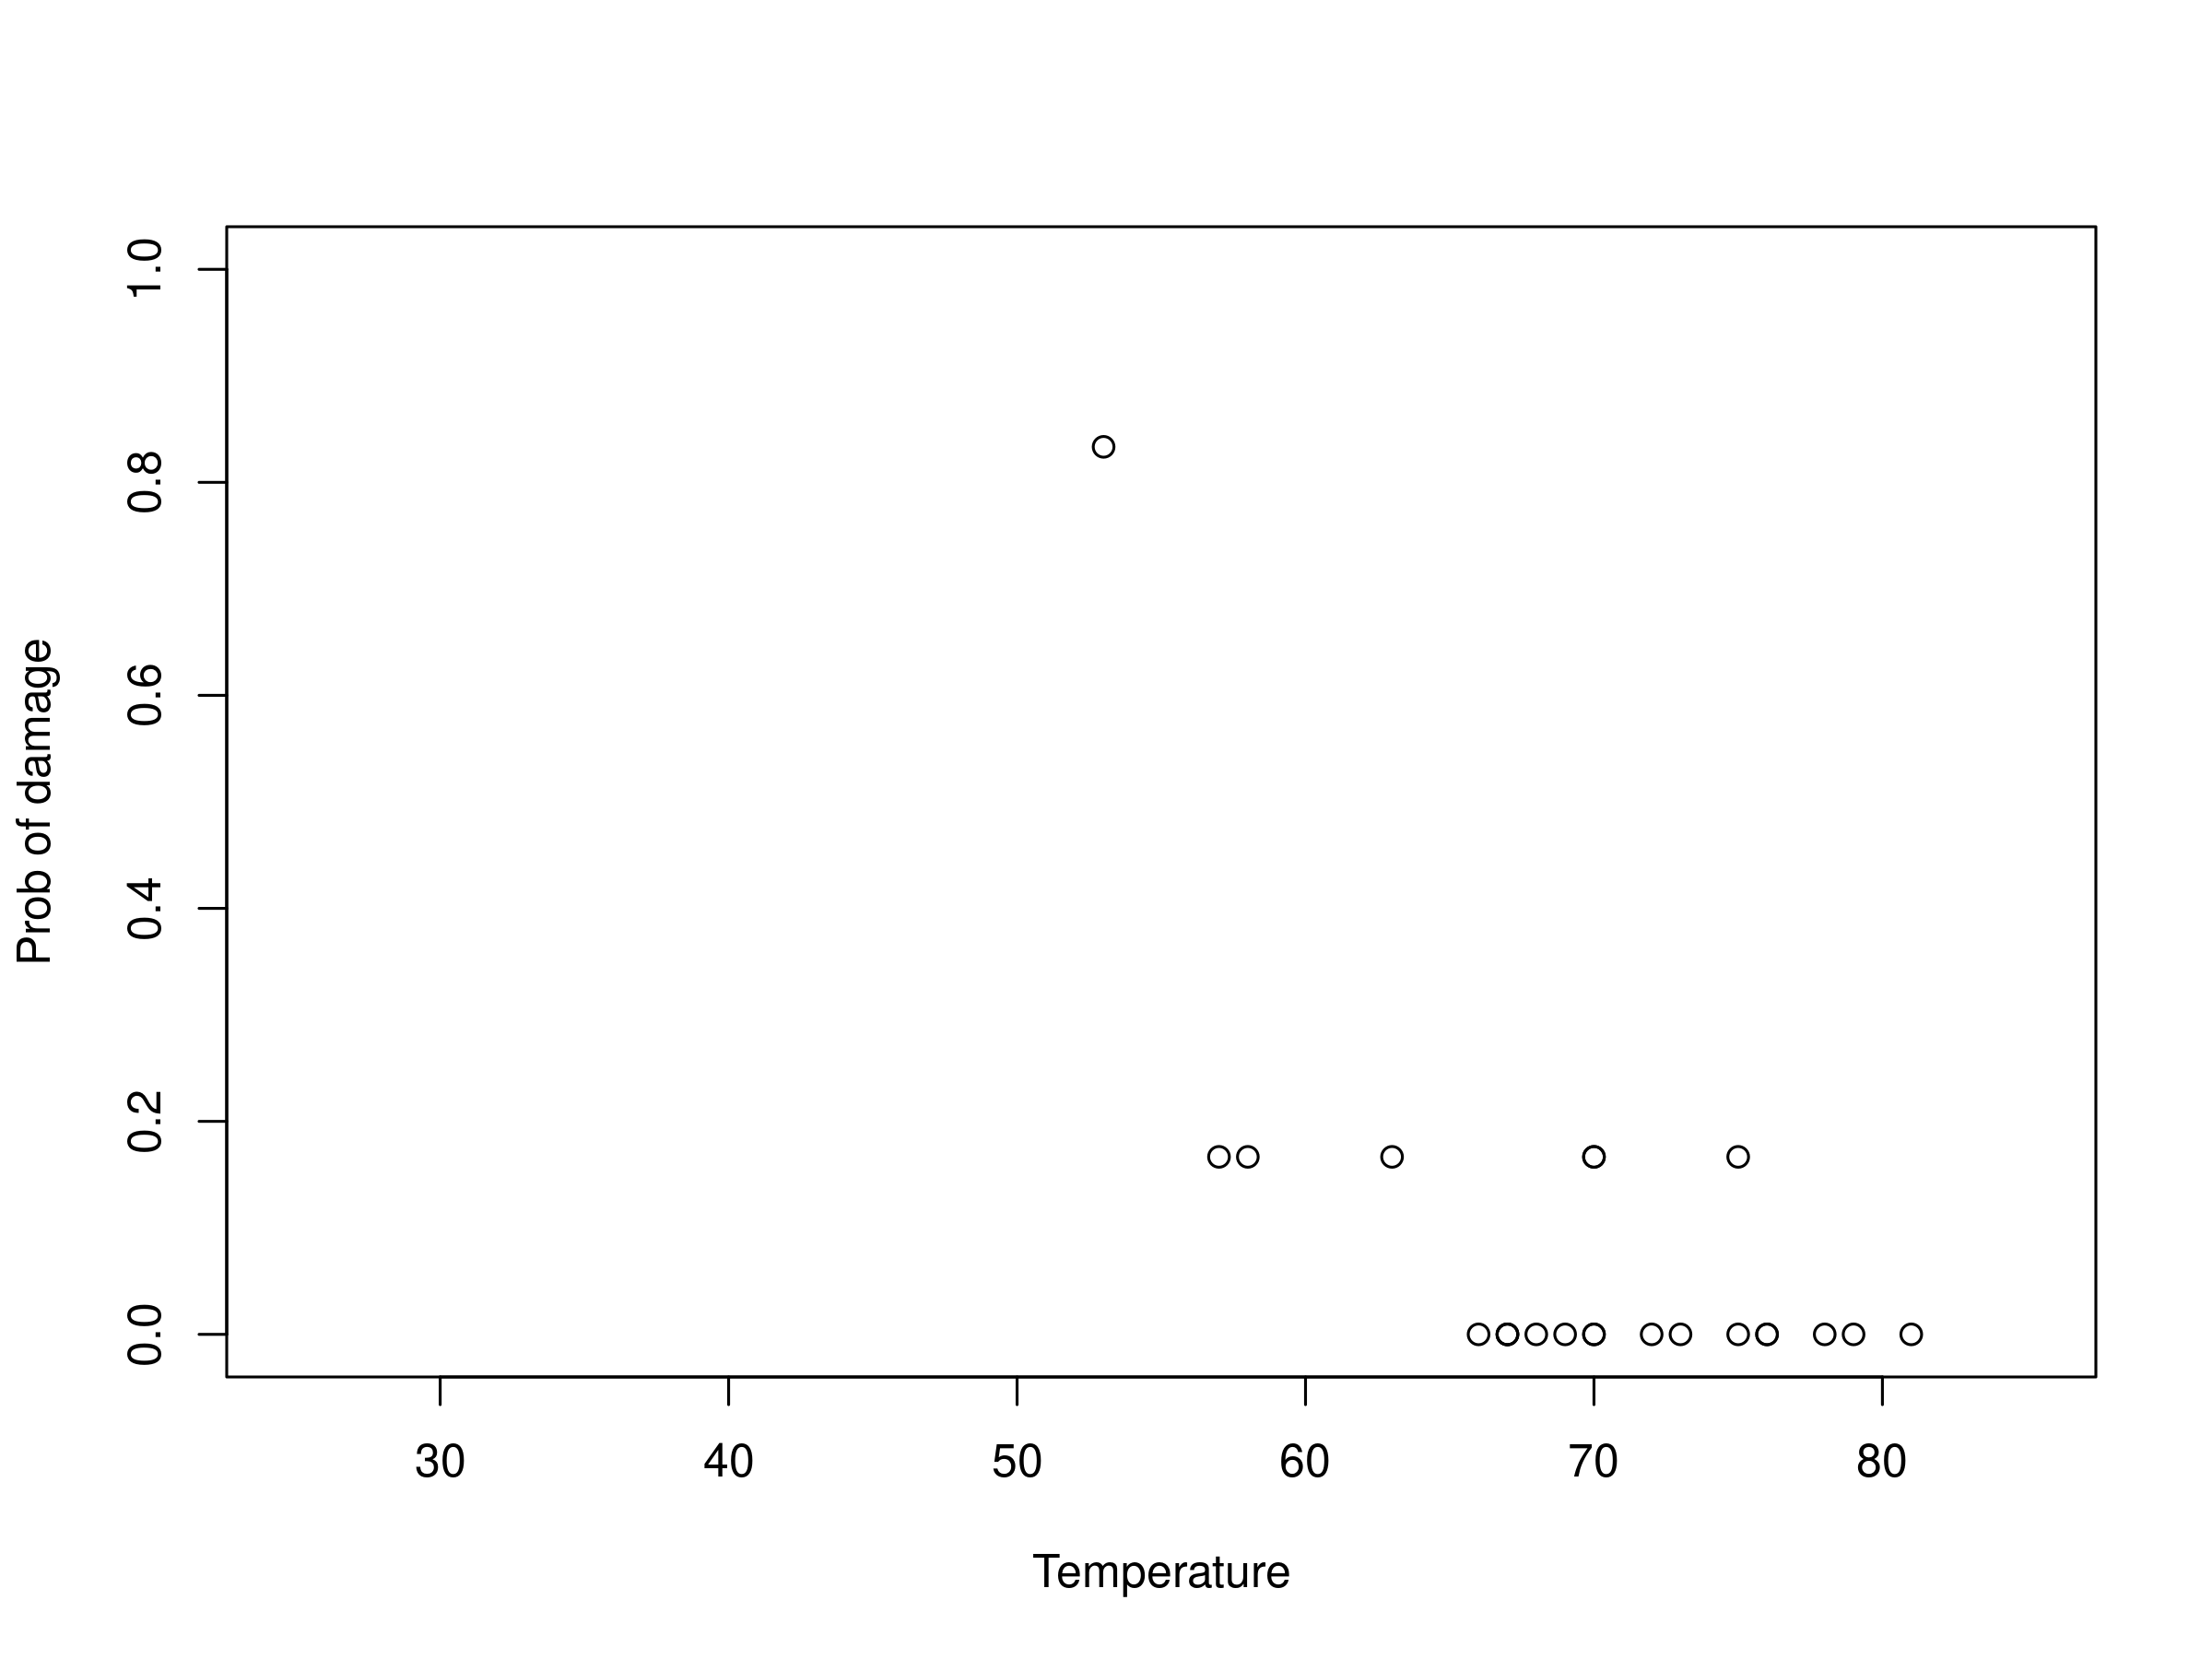

In [7]:
plot(damage/6 ~ temp, orings, xlim=c(25,85), ylim = c(0,1), xlab="Temperature", ylab="Prob of damage")

여기서 O-ring의 이상작동 확률이 **온도**와 어떻게 연관되는지를 살펴보고자 한다.
- 6-damage의 뜻은 이상반응이 없는 것이라는 뜻.

In [8]:
lmod <- glm(cbind(damage,6-damage) ~ temp, family=binomial,orings)
sumary(lmod)

             Estimate Std. Error z value  Pr(>|z|)
(Intercept) 11.662990   3.296263  3.5382 0.0004028
temp        -0.216234   0.053177 -4.0663 4.777e-05

n = 23 p = 2
Deviance = 16.91228 Null Deviance = 38.89766 (Difference = 21.98538) 


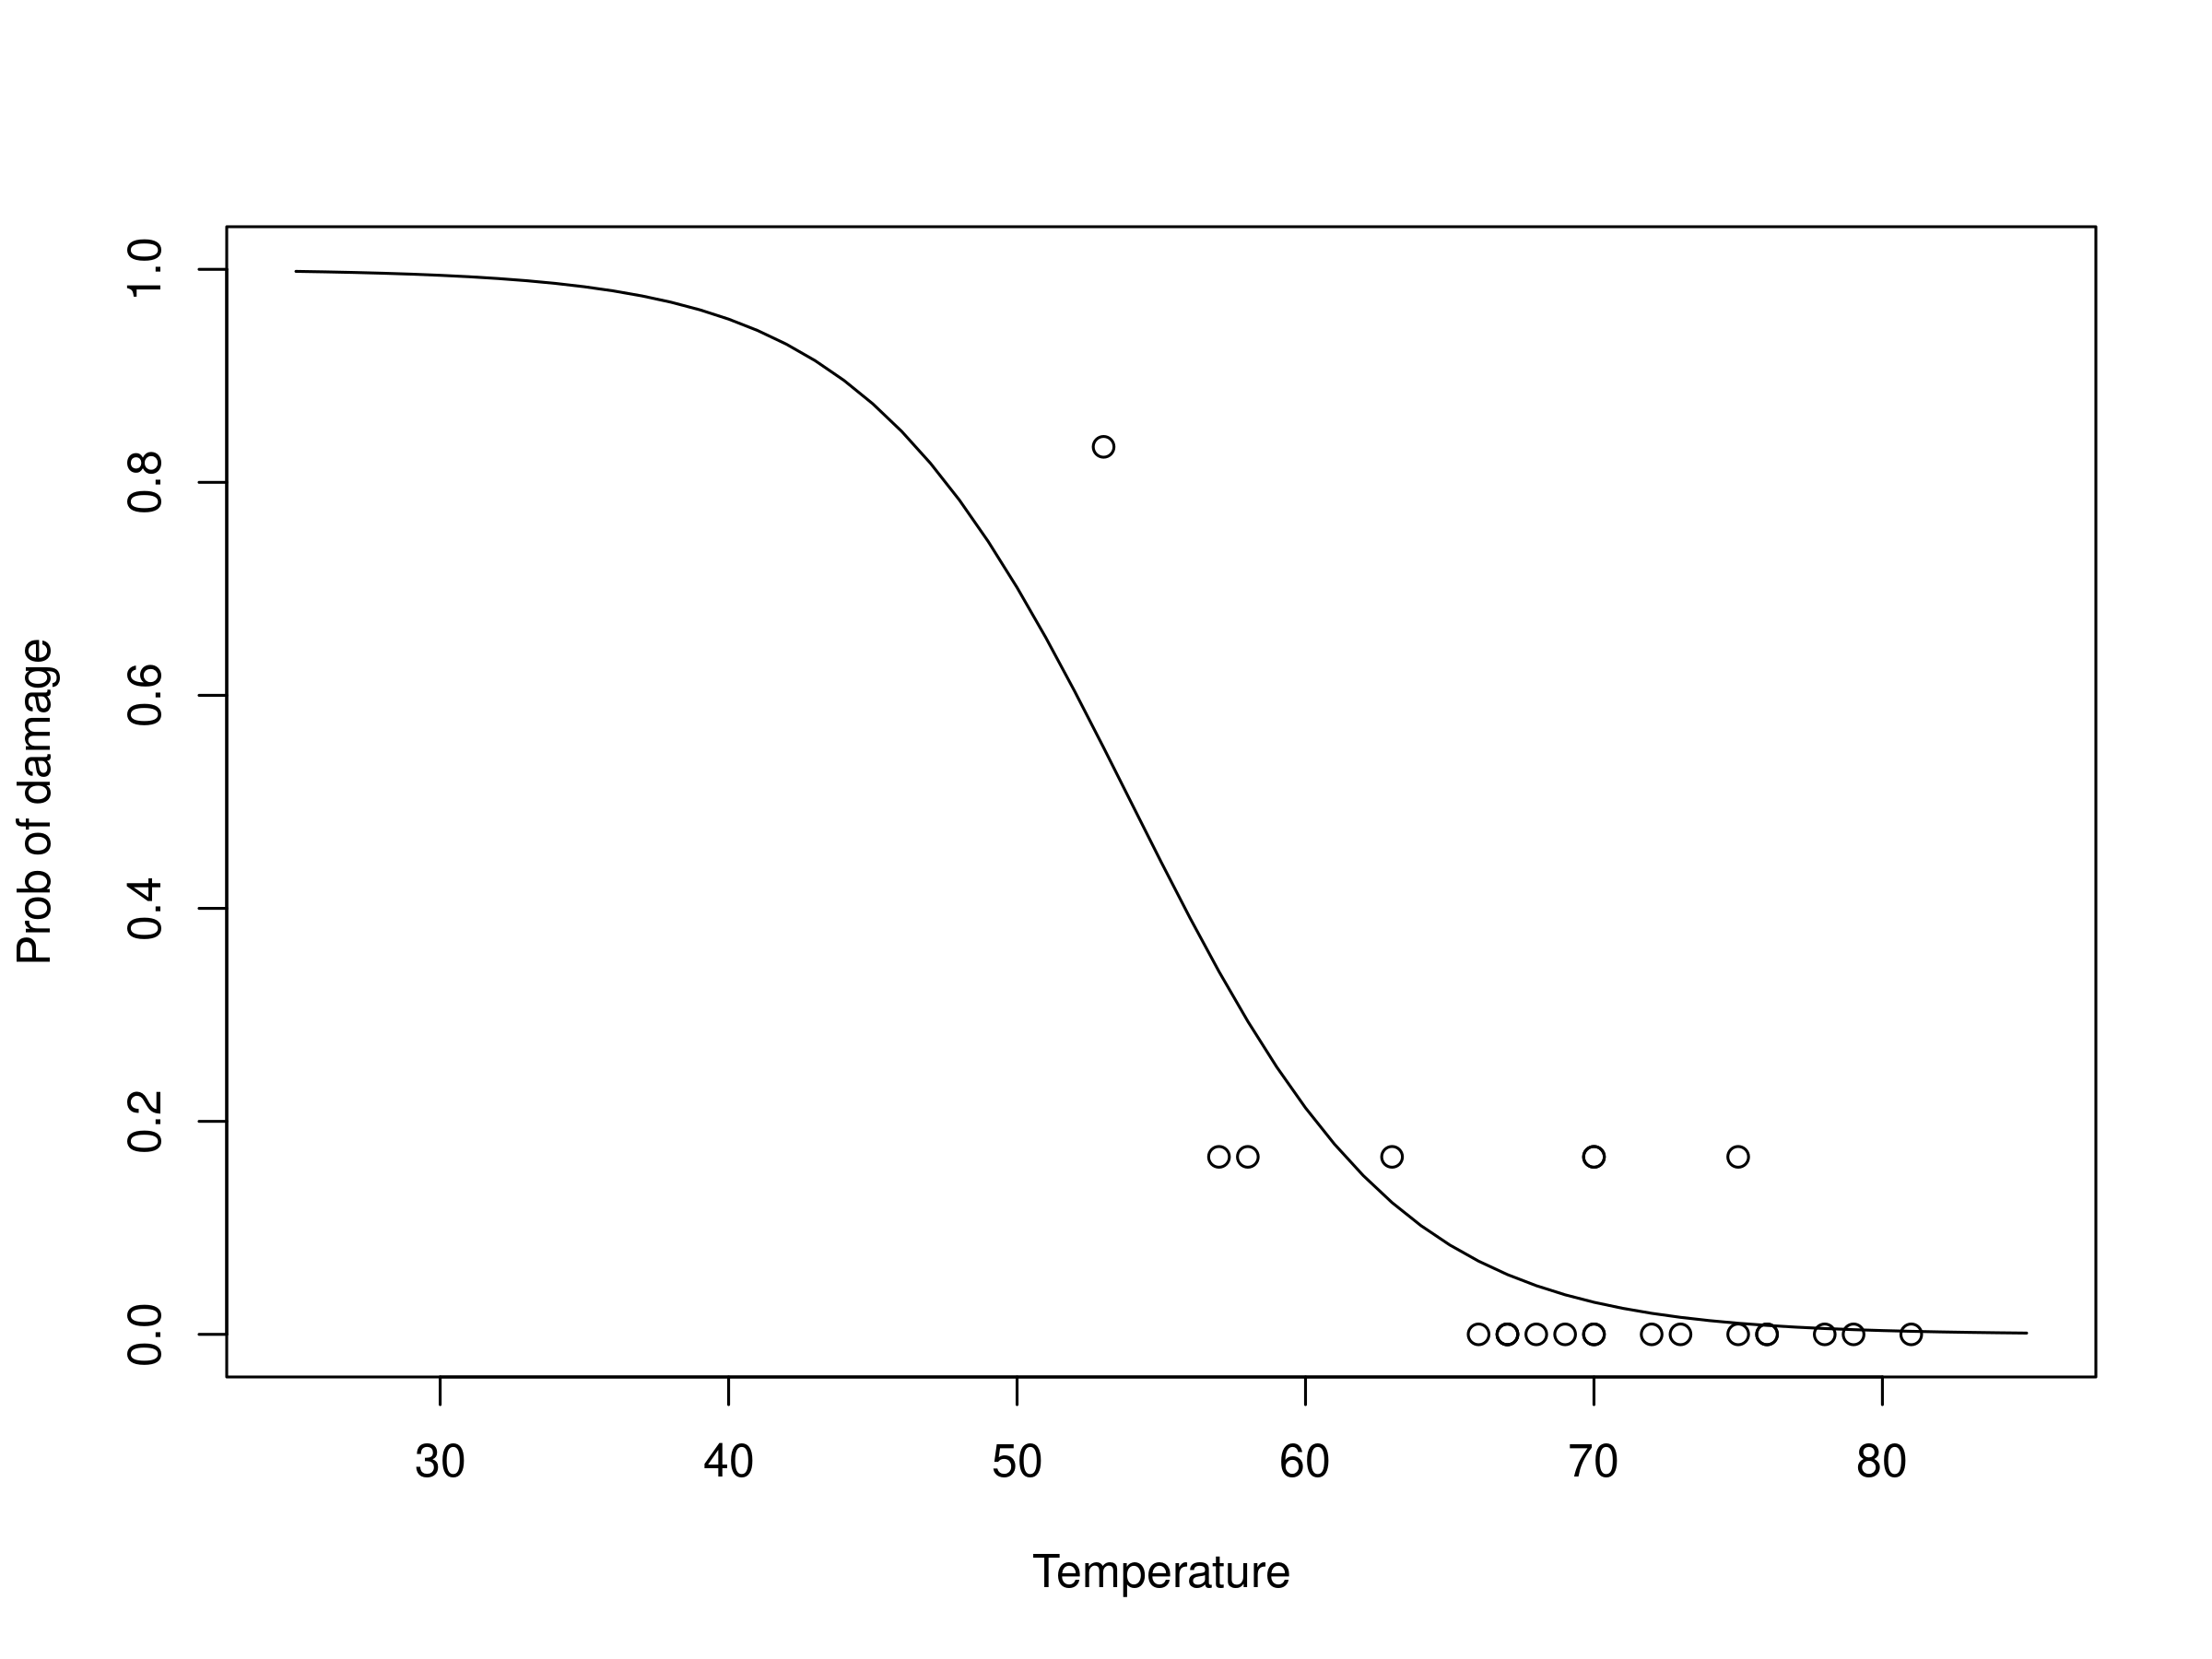

In [9]:
x <- seq(25,85,1)
plot(damage/6 ~ temp, orings, xlim=c(25,85), ylim = c(0,1), xlab="Temperature", ylab="Prob of damage")
lines(x,ilogit(11.6630-0.2162*x))

- 적합된 logistic curve이다.

In [10]:
ilogit(11.6630-0.2162*31)         # estimated probability

[1] 0.9930414

우리는 한번의 발사, 즉 6개의 O-ring에 대한 관측을 하나의 binomial 변수에 대한 관측치로 간주한 셈이다. 만약, 각 O-ring에 대한 관측을 개별적인 관측치로 (즉, binary resposne로) 간주하면 어떻게 되겠는가?

In [11]:
erings <- with(orings, data.frame(temp=rep(temp,each=6), damage=as.vector(sapply(orings$damage, function(x) rep(c(0,1), times=c(6-x,x))))))
head(erings)

,temp,damage
,<dbl>,<dbl>
1,53,0
2,53,1
3,53,1
4,53,1
5,53,1
6,53,1


In [12]:
emod <- glm(damage ~ temp, family=binomial, erings)
sumary(emod)

             Estimate Std. Error z value  Pr(>|z|)
(Intercept) 11.662990   3.296157  3.5384 0.0004026
temp        -0.216234   0.053175 -4.0665 4.773e-05

n = 138 p = 2
Deviance = 54.75942 Null Deviance = 76.74480 (Difference = 21.98538) 


- `Difference`가 `21.98538`으로 같은 모습!
- 모형의 적합도에서는 차이가 중요하다.

In [13]:
confint(lmod)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),5.575195,18.737598
temp,-0.332657,-0.120179


추정치 및 표준오차, 모형의 deviance등 모든 것이 일치함을 확인할 수 있다.

## 2. 분류문제에서의 활용

Binary response 문제는 분류문제에 활용될 수 있다. 기본적으로 $p_i=P(Y_i=1|X_i)$를 모형화하여 추정할 수 있으므로 이 추정확률(혹은 예측확률)을 바탕으로 $\hat{Y}_i∈\{0,1\}$을 얻을 수 있게 된다. 이 때 $\hat{p}_i⟶\hat{Y}_i$ 과정에서는 적절한 cut-off (threshold) 값이 필요하다.

- 주어진 선형 함수에서 event 확률을 적절하게 추정하자.
- cut-off (threshold)에 따라 달라질 수 있다. 즉, 영향을 미친다.
- $\hat{p_i} \in (0,1) \to \hat{Y_i} \in {0,1}$
    - ex) $\hat{p_i} = 0.2 \to 0$
    - 0에 가까우니 0으로 볼래! 하지만 이것은 정해진 것이 아니다.

## 3. 다항로지스틱 모형

response가 셋 이상의 범주로 나타나는 경우도 있다. 예를 들어 어떤 질병에서 환자의 재발여부만을 모형화 하자면 binary response로 생각할 수 있지만 재발부위를 세분화 하여 모형화하고자 한다면 multinomial response를 고려하는 것이 타당하다.
- 베르누이의 다범주 분포로의 자연스러운 확장

이 경우 $(Y_1,Y_2, \dots Y_K)∼Multi(n,(p_1,p_2,…,p_K)′)$이고 각 $p_i$에 대하여 다음과 같은 모형화를 고려할 수 있다.

$$log\frac{p_j}{p_K}=β_{j0}+∑_{s=1}^{q}β_{js}X_s,  j=1,2,…,K−1$$
- $p_j$는 변화하지만 $p_K$는 고정이다.
- $(q+1) \times (k-1)$ 개의 $\beta$가 존재한다.
- $log\frac{p_1}{p_K} = X' \beta_1 ,\dots, log\frac{p_j}{p_K} = X' \beta_{K-1}$ 
    - 으로 모델링, 아래 로지스틱과 흡사!
    - $log\frac{p}{1-p} = X\beta \to log \frac{P(Y=1|x)}{P(Y=0|x)} = X \beta$

위 모형에서 $K$번째 범주가 기준(reference level)으로 설정되었다. 모수의 추정 등은 최대가능도추정법 등을 활용하여 가능하다. 만약 $K=2$이면 **위 모형은 binary response에서의 로지스틱 모형과 일치**한다.

이러한 다항로지스틱 모형은 (이항)로지스틱 모형의 자연스러운 확장으로 볼 수 있으며 다수준을 가지는 분류문제에의 활용도 가능하다.

때로는 다항반응변수의 경우 특정수준을 제외한 다른 수준을 병합하여 binary문제로 바꾸어 모형화 하고, 이러한 방식을 모든 수준에 대해서 반복하는 방식으로 접근하기도 한다.
- (재발 O[0=base], 같은 부위[1], 다른 부위[2])가 있을떄
    - 여기서 기준 변수(base)는 모형을 해석하기 좋게 선택해야 한다.
    - 이렇게 세 개의 변수가 있을때, [[0,1],2],[1,[0,2]],[0,[1,2]]이렇게 나눠서 확률을 각각 다른 모형에서 추정한다.
    - 의미 확인은 힘들고, 예측만 recommend

## 4. Count regression

만약 반응변수가 0 이상의 정수값을 가지는 경우 count regression을 이용할 수 있다. 보통 발생사건의 개수 등을 반응변수로 가지는 경우가 대부분이다.

### 4.1 Poisson regression : most commly used

count regression은 Poisson 분포를 이용한 접근이 가장 일반적이다.

$Y$ 가 $Poisson(μ)$라면 $E(Y)=Var(Y)=μ$이 된다. 즉, **기대값과 분산이 일치한다.**
- $p(X=x) = \frac{e^-\mu \mu^x}{x!}, x=0,1,2,\dots$

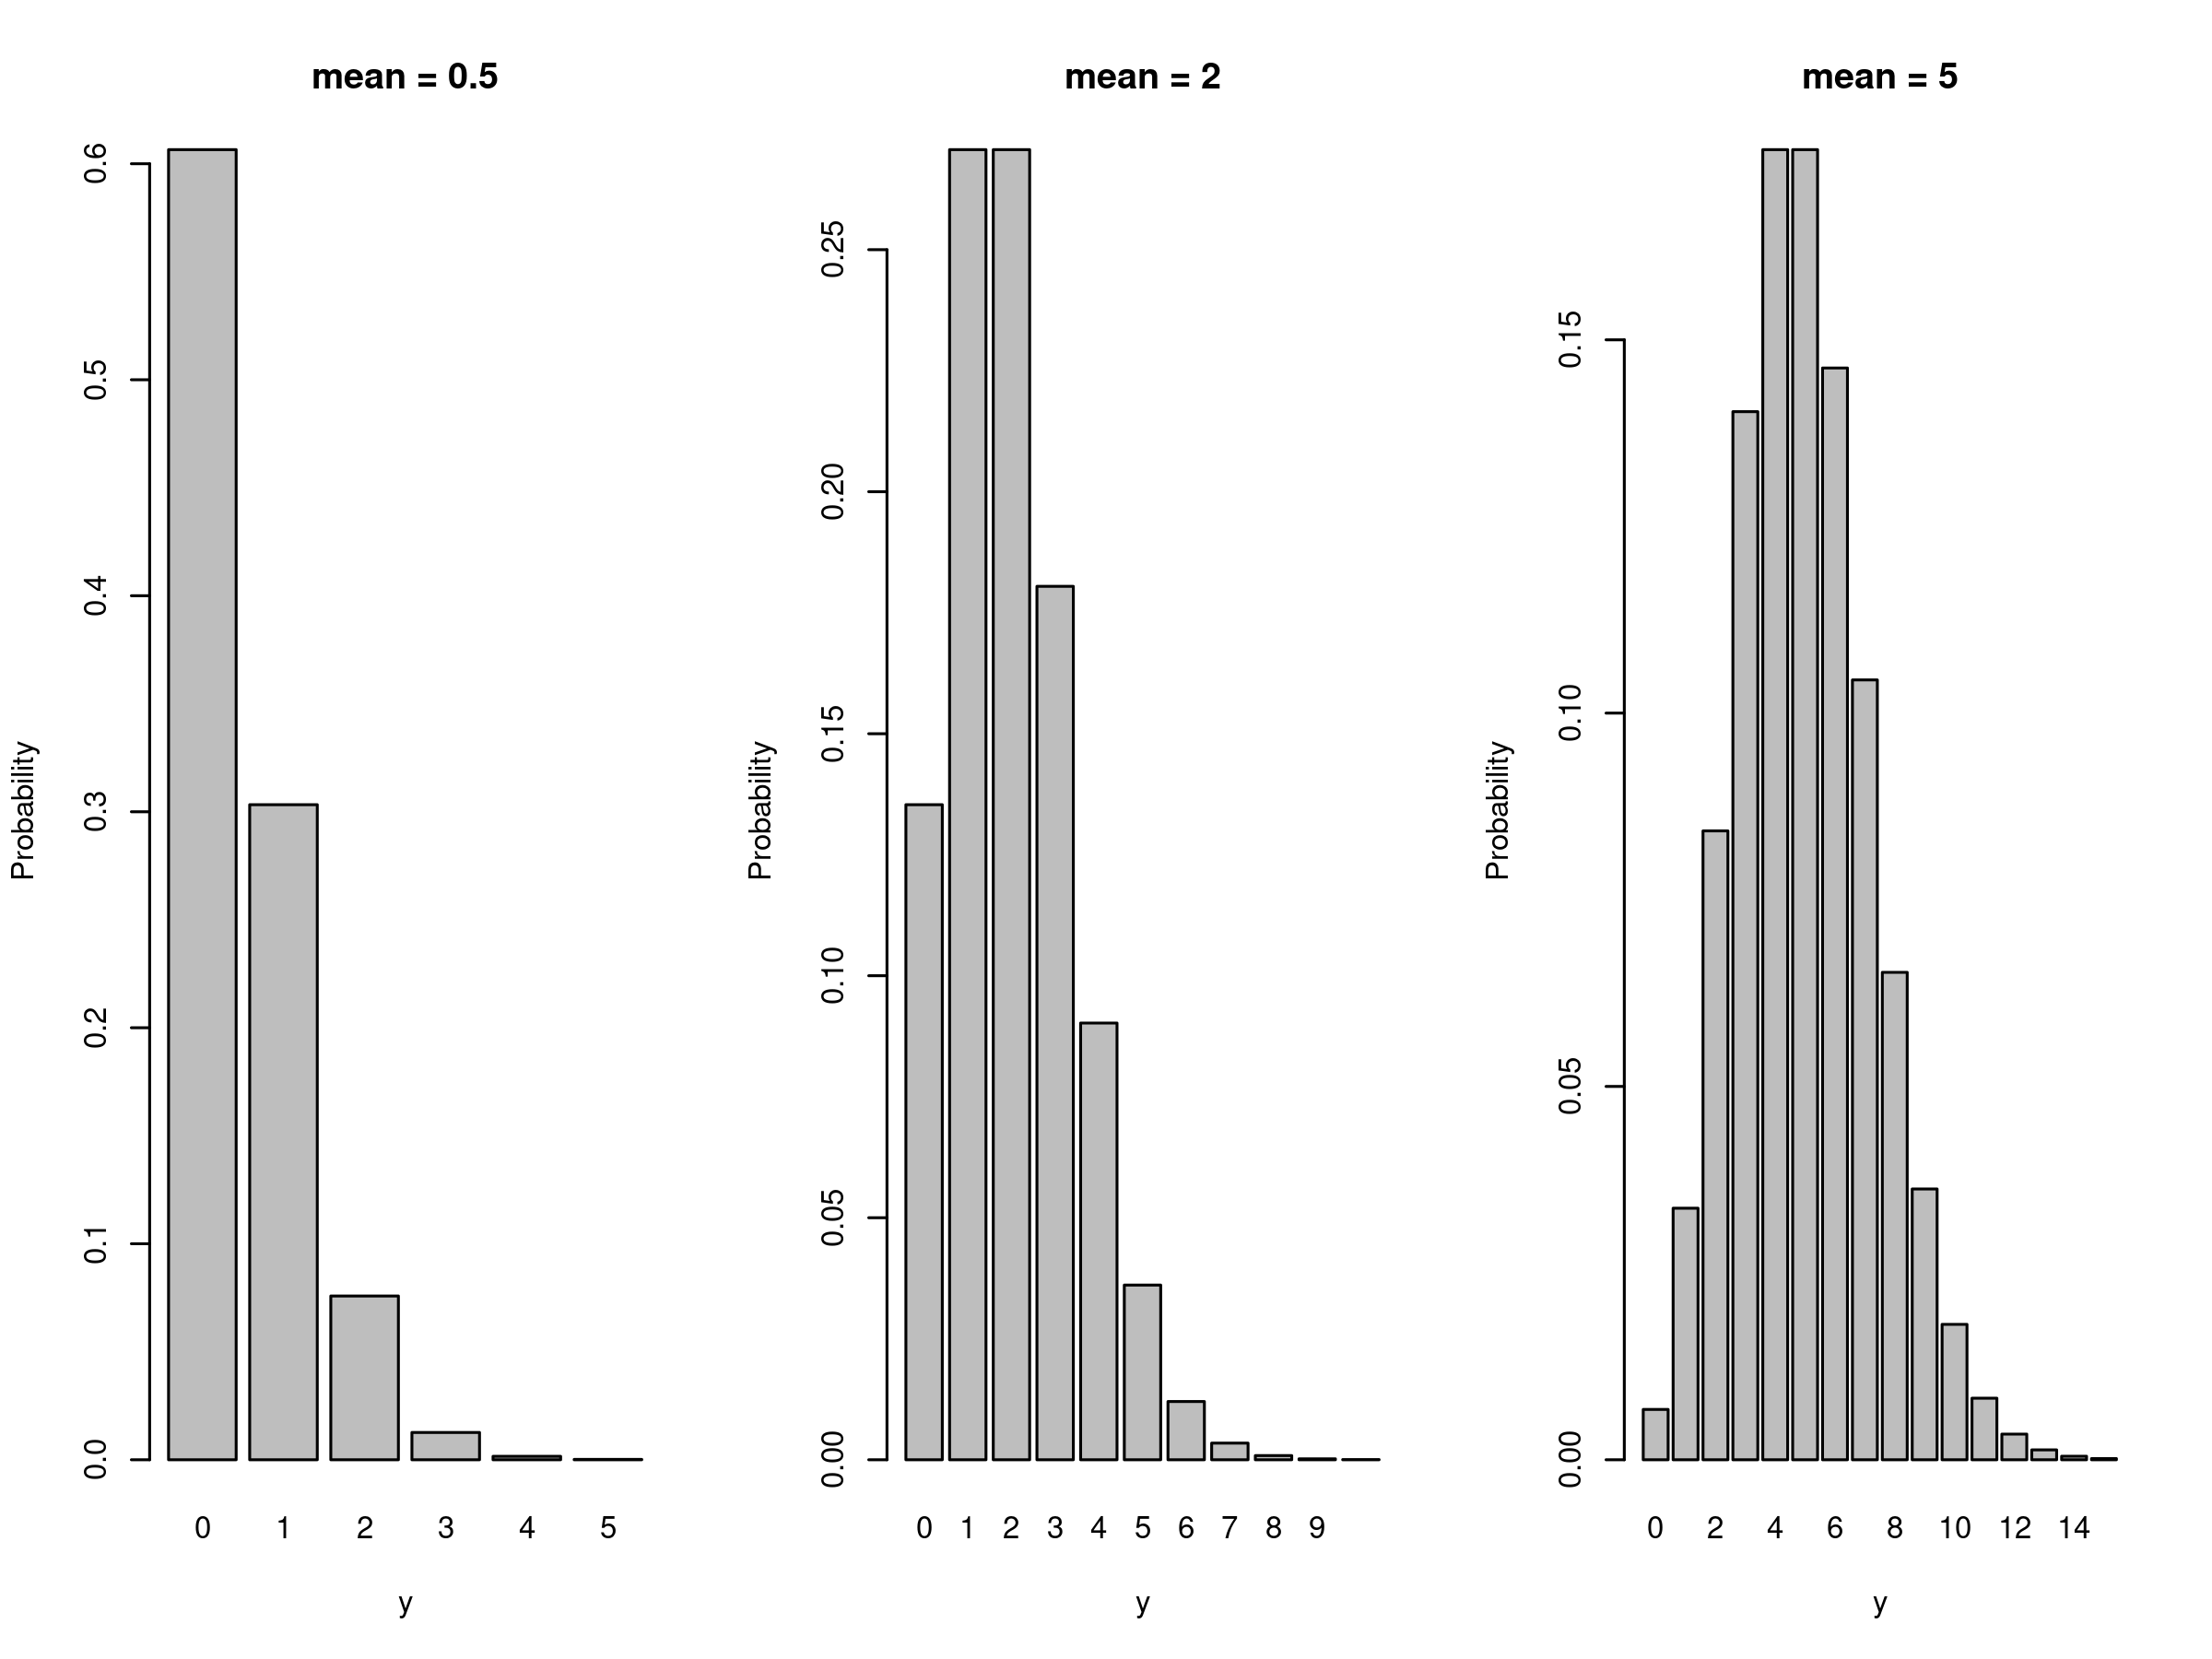

In [14]:
par(mfrow=c(1,3))
barplot(dpois(0:5,0.5),xlab="y",ylab="Probability",names=0:5,main="mean = 0.5")
barplot(dpois(0:10,2),xlab="y",ylab="Probability",names=0:10,main="mean = 2")
barplot(dpois(0:15,5),xlab="y",ylab="Probability",names=0:15,main="mean = 5")

> `Galapagos` data : 30개의 갈라파고스 제도 섬에서 7개 변수에 대한 관측치가 있다. 식물의 종 개수와 몇 가지 지리적 변수 정보 사이의 연관성을 알고자 한다. 먼저 선형회귀모형에 의한 모형화를 실시해보자.

$\uparrow$ 만약, 섬이 주변에 많이 없다면 종 교류가 적어서 영향을 끼치는 것일까? 등

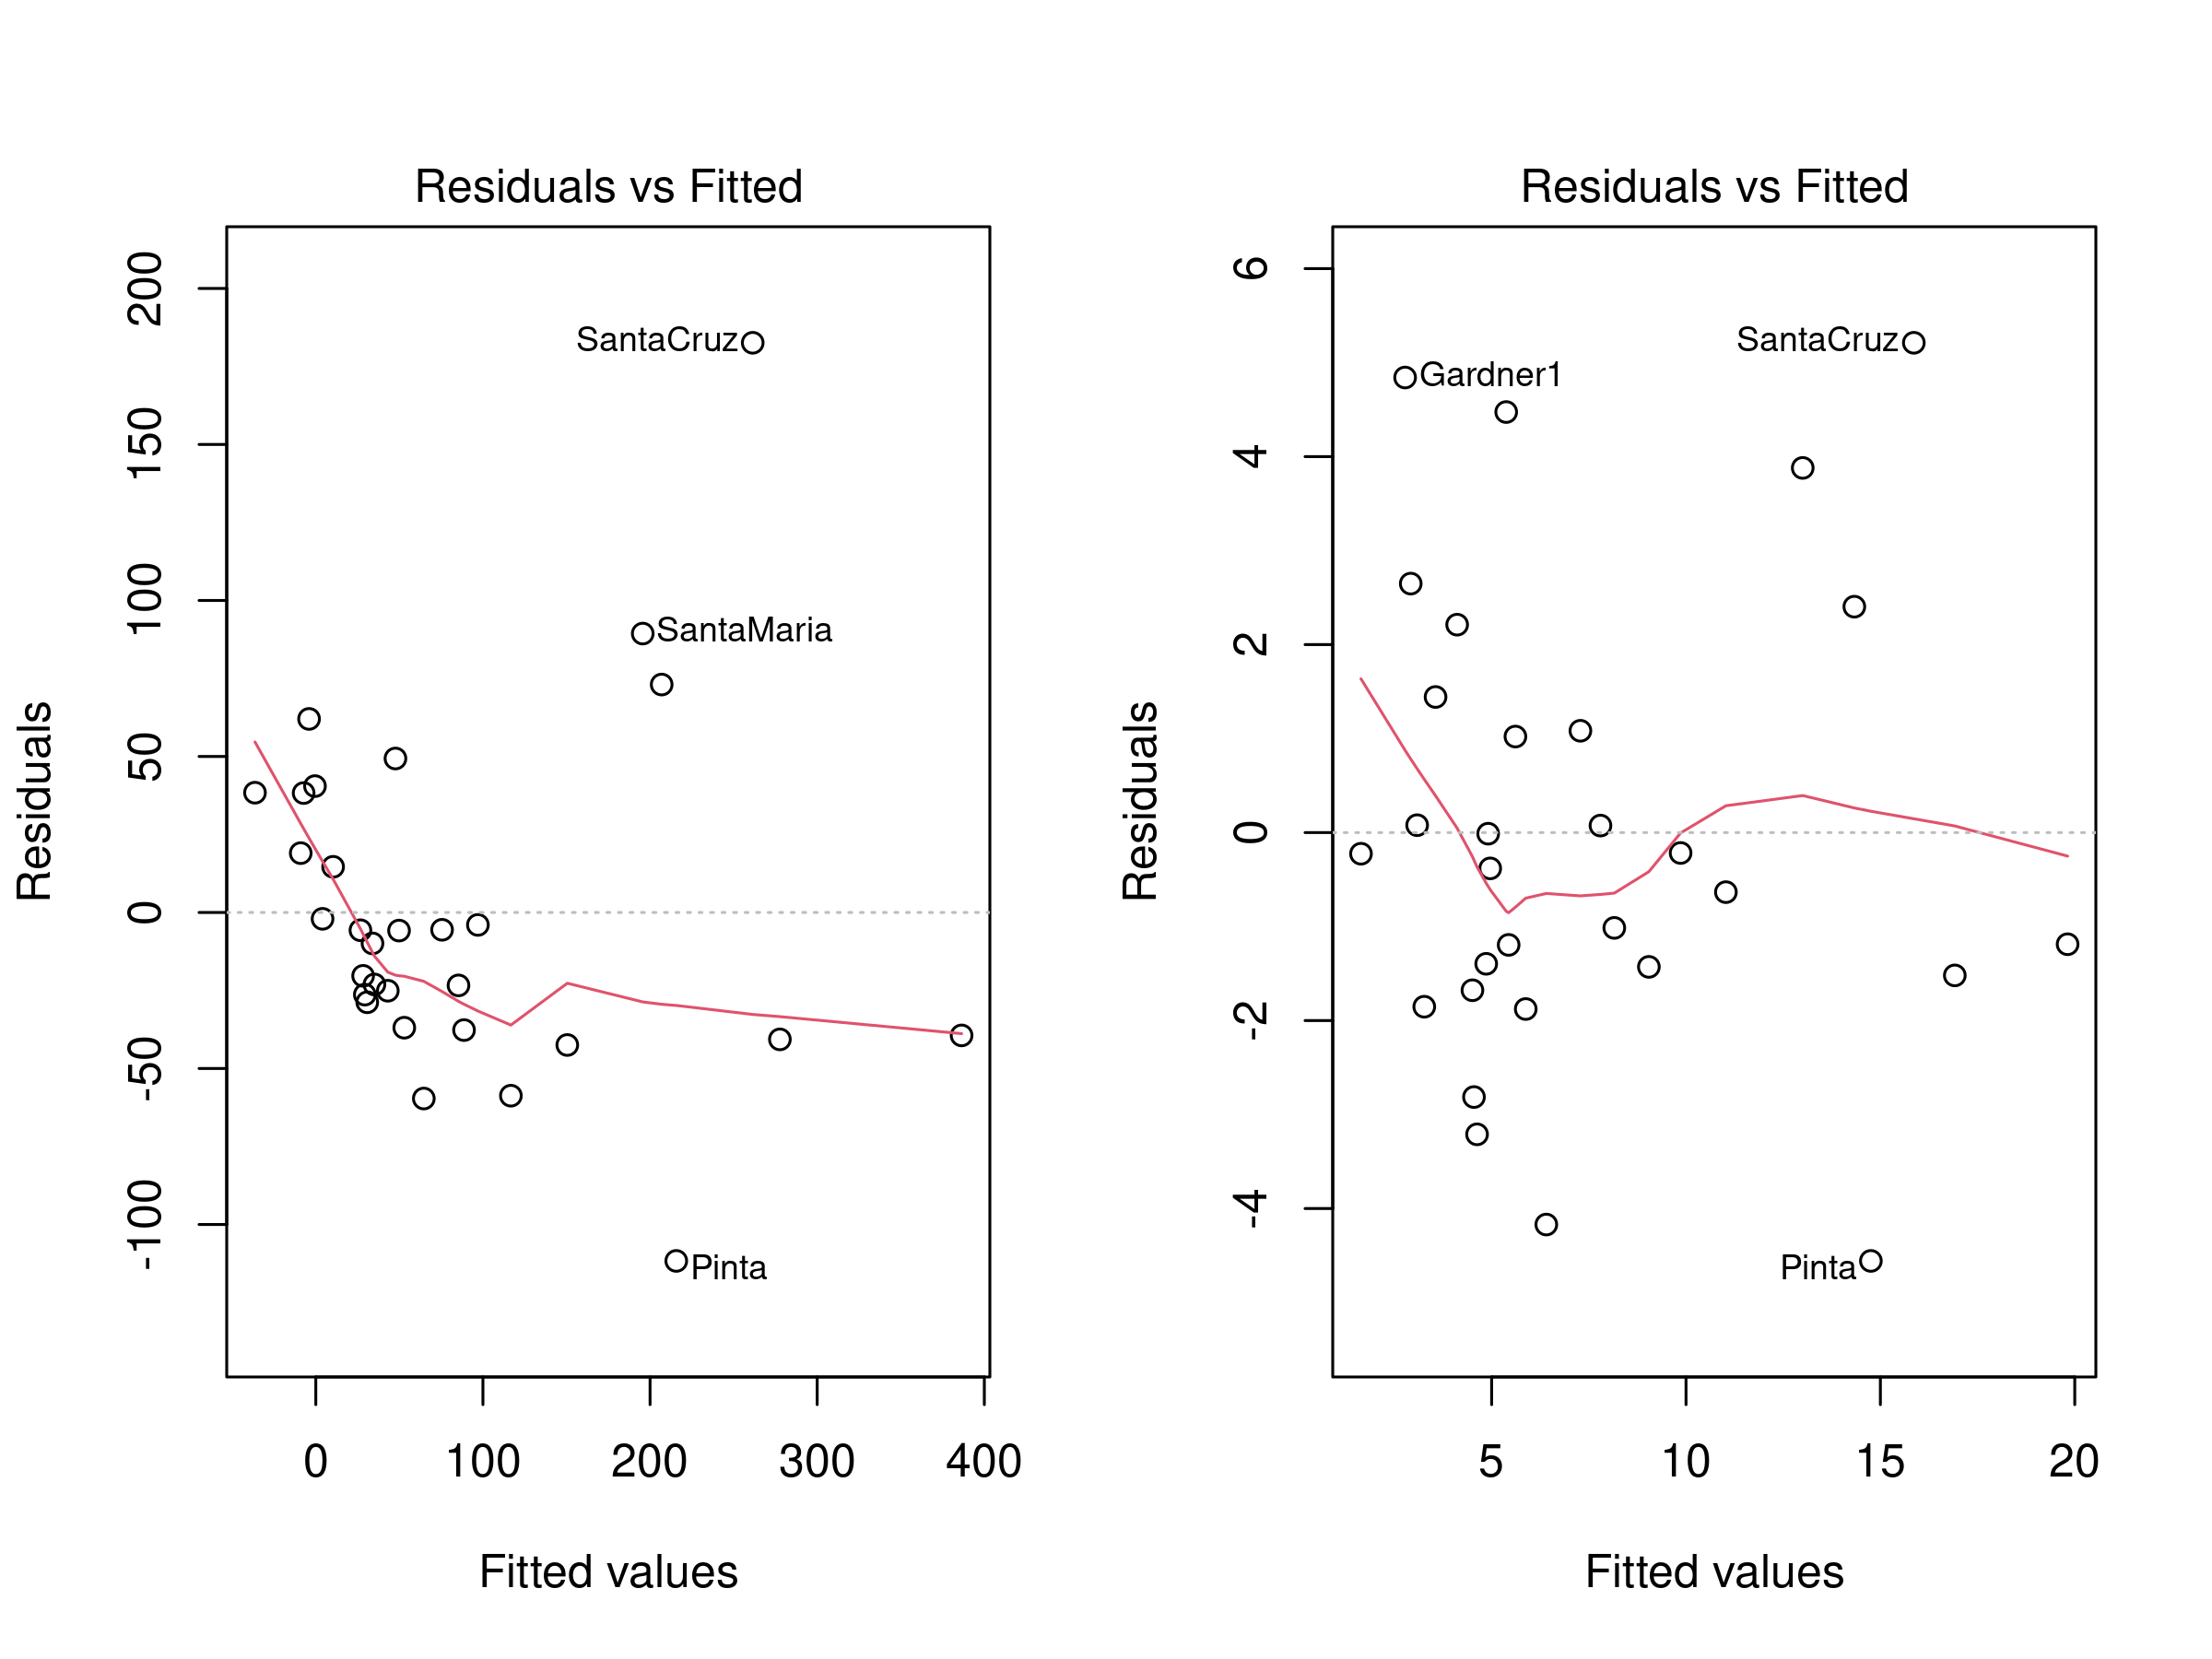

In [15]:
data(gala, package="faraway")
gala <- gala[,-2]
par(mfrow=c(1,2))
mod1 <- lm(Species ~ . , gala)
plot(mod1, 1)
mod2 <- lm(sqrt(Species) ~ . , gala) # transformation on response
plot(mod2, 1)

$\uparrow$ 둘 다 별로지만, 원본 모형보다 sqrt(원본)이 더 낫긴 하다.

- $Y = 0$ or $1 \to$ 선형모형 X
- $Y = 0,1,\dots \to$ 선형모형
    - count형인 Y를 연속형이라 간주해도 무방한 경우가 있다.

In [17]:
sumary(mod2)

               Estimate  Std. Error t value  Pr(>|t|)
(Intercept)  3.39192432  0.87126781  3.8931 0.0006900
Area        -0.00197182  0.00101993 -1.9333 0.0650799
Elevation    0.01647844  0.00244096  6.7508 5.546e-07
Nearest      0.02493256  0.04794953  0.5200 0.6078444
Scruz       -0.01348264  0.00979801 -1.3761 0.1815090
Adjacent    -0.00336689  0.00080513 -4.1818 0.0003325

n = 30, p = 6, Residual SE = 2.77358, R-Squared = 0.78


적합도 자체는 나쁘지 않으나 반응변수에 대한 변환을 한 상황이다. 또한 잔차도 상에 일정한 패턴이 조금 눈에 띈다. 다음으로 Poission regression을 적용해 보자.

$Y_{x_1,\dots x_i}∼Poisson(μ_i)$로 가정하자. 그러면 다음과 같은 모형화가 기본적으로 가능할 것이다.

$$E(Y_i|x_1,…,x_q)=μ_i=β_0+β_1x_{i1}+⋯+β_qx_{iq}$$
- $x$값들은 양수

이 경우 양 변의 range는 일치하는가?

로지스틱 모형의 경우와 같이 적절한 연결함수를 고려하자. Poisson regression에서는 log 연결함수가 일반적이다.

$$log(μ_i)=η_i=β_0+β_1x_{i1}+⋯+β_qx_{iq}$$

In [18]:
modp <- glm(Species ~ ., family=poisson, gala)
sumary(modp)

               Estimate  Std. Error  z value  Pr(>|z|)
(Intercept)  3.1548e+00  5.1750e-02  60.9630 < 2.2e-16
Area        -5.7994e-04  2.6273e-05 -22.0737 < 2.2e-16
Elevation    3.5406e-03  8.7407e-05  40.5070 < 2.2e-16
Nearest      8.8256e-03  1.8213e-03   4.8459 1.261e-06
Scruz       -5.7094e-03  6.2562e-04  -9.1260 < 2.2e-16
Adjacent    -6.6303e-04  2.9328e-05 -22.6078 < 2.2e-16

n = 30 p = 6
Deviance = 716.84577 Null Deviance = 3510.72862 (Difference = 2793.88284) 


- Deviance는 SSE를 일반화한 개념이다.

### 4.2 Dispersed Poisson model

앞서 언급했듯이 Poisson 분포는 평균과 분산이 동일하다. 위 적합된 모형에서 이를 살펴보자.

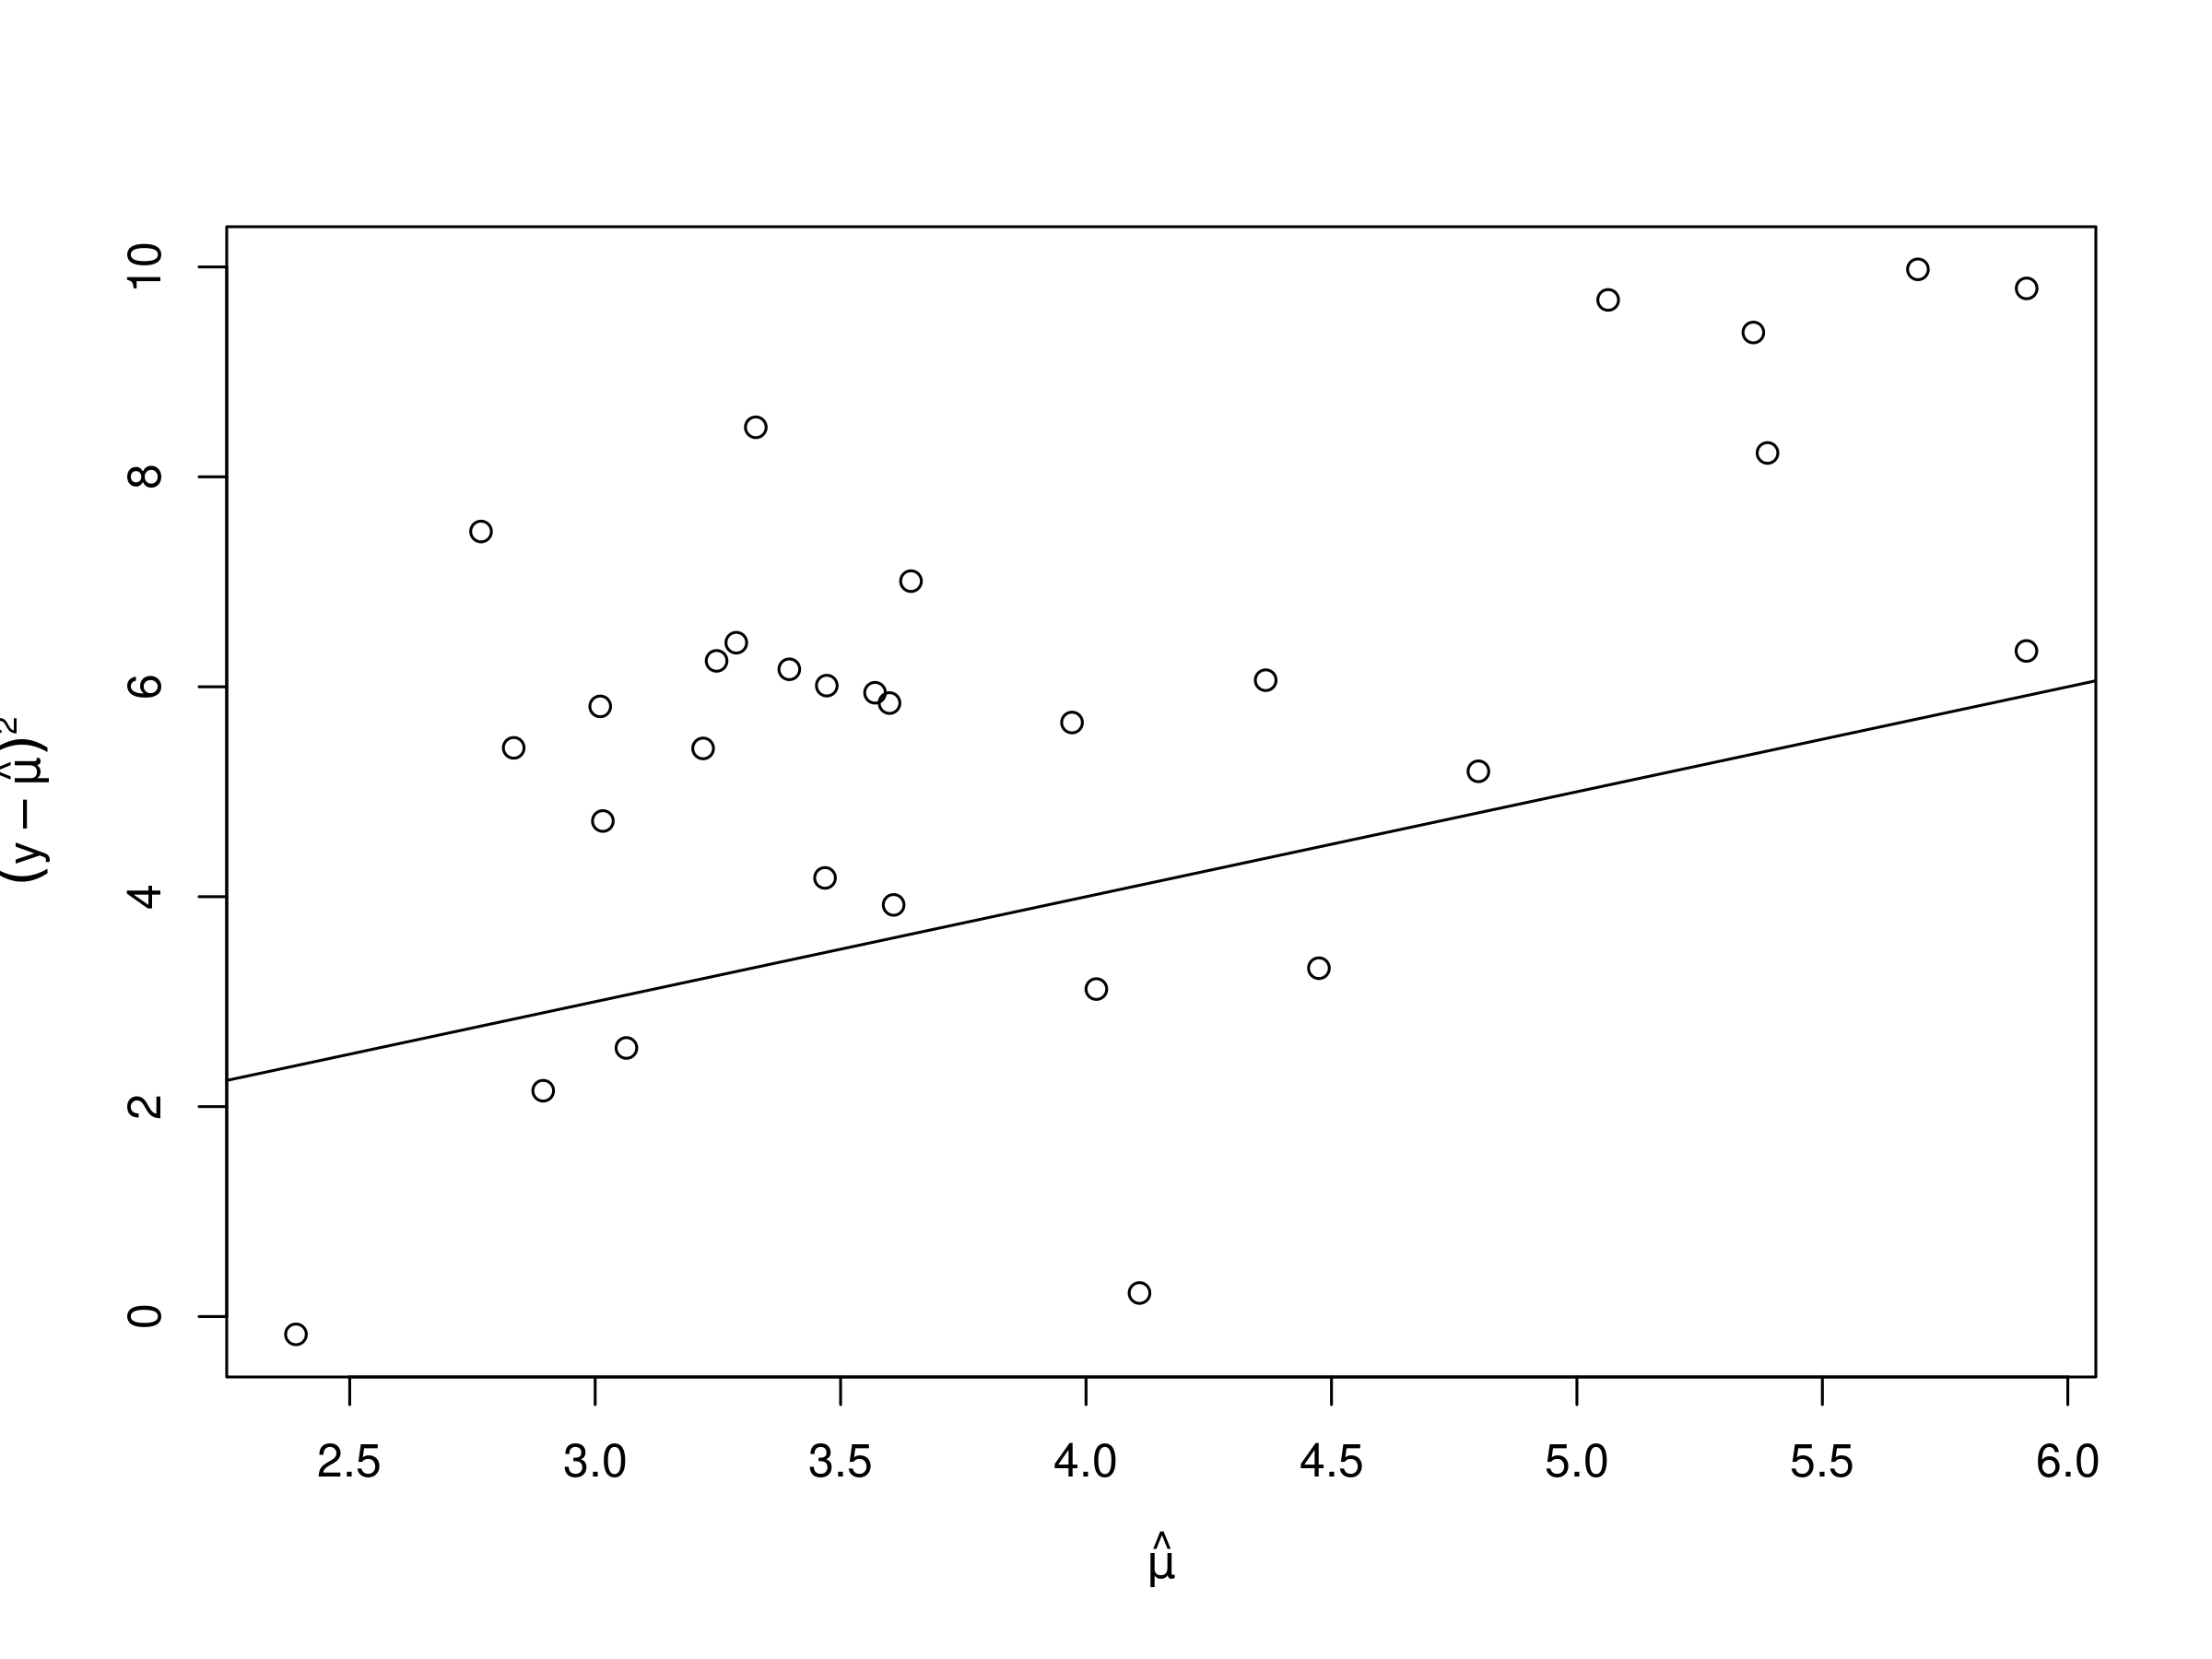

In [20]:
plot(log(fitted(modp)),log((gala$Species-fitted(modp))^2), xlab=expression(hat(mu)),ylab=expression((y-hat(mu))^2))
abline(0,1)

- 대부분 값이 선 위에 있다.
- $Var(X) > E(x)$
    - 설명하기 쉽지 않은 데이터
- 파라메터가 1개라면 유연성이 떨어질 수 이ㅆ지만, 2개면 유연한 분석이 가능하다.    

여기서 $(y−\hat{μ})^2$ 는 분산에 대한 crude한 근사값이다.

전반적으로 분산이 평균에 비례하지만 높은 수준에서 값을 가지는 것이 관측된다. 즉, Poisson 분포의 기본가정이 만족되는 것으로 보기 어렵다.

이에 대한 해결책은 여러 가지가 있으나 대표적으로는 **(1) 음이항분포를 이용한 모형화 (2) dispersion parameter를 추가로 고려하는 모형화** 정도가 있다. (2)의 경우 $Var(Y)=ϕμ$를 만족다도록 추가적인 모수 $ϕ$를 고려하는 것이다. 이 값이 1이면 보통의 Poisson regression이 되고 $ϕ>1(ϕ<1)$ 는 over(under)dispersion case가 된다.

ϕ는 다음과 같이 추정될 수 있다.


$$ϕ=\frac{∑_i(y_i−\hat{μ_i})^2 \hat{\mu_i}} {n−p}$$
- 포아송에서 표준화된 SSE와 비슷하다.

In [21]:
(dp <- sum(residuals(modp,type="pearson")^2)/modp$df.res)

[1] 31.74914

$\uparrow$ 강력하게 1보다 크다.
- 평균보다 분산이 크다.

In [22]:
sumary(modp,dispersion=dp)

               Estimate  Std. Error z value  Pr(>|z|)
(Intercept)  3.15480788  0.29158975 10.8193 < 2.2e-16
Area        -0.00057994  0.00014804 -3.9175 8.947e-05
Elevation    0.00354059  0.00049251  7.1889 6.530e-13
Nearest      0.00882557  0.01026214  0.8600    0.3898
Scruz       -0.00570942  0.00352514 -1.6196    0.1053
Adjacent    -0.00066303  0.00016525 -4.0123 6.013e-05

Dispersion parameter = 31.74914
n = 30 p = 6
Deviance = 716.84577 Null Deviance = 3510.72862 (Difference = 2793.88284) 


위 결과로부터 통계적으로 유의미한 변수들에 차이가 발생했음을 알 수 있다. 눈여겨볼 점은 dispersion parameter의 고려가 추정치에는 전혀 영향열 미치지 않았다는 점이다. 단지 추정치의 표준오차를 바꿀 뿐이다.

추정치는 4.1 마지막과 4.2가 같다.
- 분산을 유연하게 하니(2개) 유의했던 것이 유의하지 않게 나오기도 했다.
- 평균 자체를 건들이진 않고 Y를 예측했다.